## Linear Regression (OLS, Ridge, Lasso, ElasticNet)

#### Make a prediction using a linear function of the input features.
Linear models for regression can be characterized as regression models for which the prediction is a hyperplane of n dimensions, where n is the number of features. (If one feature - then its a line)

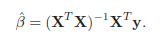

To find the optimal $\beta$ we use either the MSE or RSS (Residual Square Error) -> take the derivative.


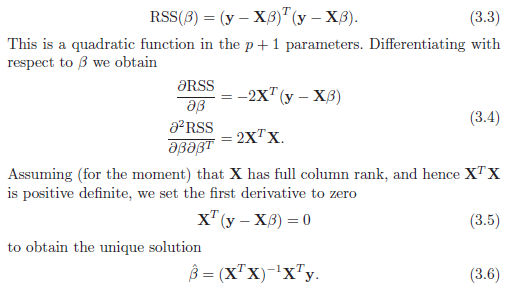

#### Important: There are assumptions of OLS below (To do & Review)

1. The model is linear $y_i = x_i^{'}\beta + e_i$

2. The observations $(y_i,x_i)$ come from an iid random sample.

3. Strict Exogenity, $E(e_i|x_j) = 0$ for all $i,j$. $E(e|X) = 0$.

4. The Variables have finite second moments $E(y^{2}_{i}) < \infty$

5. The second moment matrix of $x_i, Q_{xx} = E(x_ix_k^{'})$ is invertible


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import mglearn


In [17]:
X,y = mglearn.datasets.make_wave(n_samples = 60)
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state = 42)
lr = LinearRegression().fit(X_train,y_train)
print("Slope: {:.5f}".format(float(lr.coef_)))
print("Intercept: {:.5f}".format(float(lr.intercept_)))
print("\nTraining Set Score: {:.5f}".format(float(lr.score(X_train,y_train))))
print("Test Set Score: {:.5f}".format(float(lr.score(X_test,y_test))))

#Using Boston Data
print("\n----Boston Data---")
X,y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state = 42)
lr = LinearRegression().fit(X_train,y_train)
# print("Slope: {}".format(lr.coef_))
# print("Intercept: {}".format(lr.intercept_))
print("\nTraining Set Score: {}".format(lr.score(X_train,y_train)))
print("Test Set Score: {}".format(lr.score(X_test,y_test)))

Slope: 0.39391
Intercept: -0.03180

Training Set Score: 0.67009
Test Set Score: 0.65934

----Boston Data---

Training Set Score: 0.9448313975211594
Test Set Score: 0.7758378393351706


Since training score is similiar to test score - we are likely underfitting. In contrast, if we were to have a high training score but a low test score - we would be overfitting. 

#### Ridge Regression


Essentially Ridge Regression adds a penalty term to our cost function (MSE/RSS in the case of OLS). This penalty is also called "L2 Regularization". Effectively this shrinks the regression coefficients by imposing a penalty on their size. The Ridge coefficients minimize a penalized residual sum of squares, however, the intercept term is not included in the penalization. 

Note - Ridge Regression becomes a biased estimator.

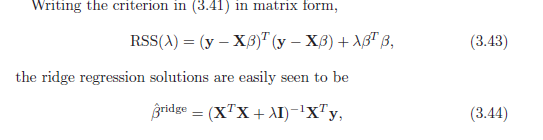

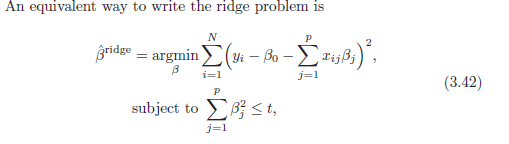

Normally, the inputs are standardized before solving. SVD* (Singular Value Decomposition) is used to solve for Ridge Regression  coef - review.

In [19]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train,y_train)
print("--Results using alpha = 1 (default)---")
# print("\nSlope: {}".format(ridge.coef_))
# print("Intercept: {}".format(ridge.intercept_))
print("\nTraining Set Score: {}".format(ridge.score(X_train,y_train)))
print("Test Set Score: {}".format(ridge.score(X_test,y_test)))


ridge = Ridge(alpha = 10).fit(X_train,y_train)
print("\n--Results using alpha = 10---")
# print("\nSlope: {}".format(ridge.coef_))
# print("Intercept: {}".format(ridge.intercept_))
print("\nTraining Set Score: {}".format(ridge.score(X_train,y_train)))
print("Test Set Score: {}".format(ridge.score(X_test,y_test)))

ridge = Ridge(alpha = 0.1).fit(X_train,y_train)
print("\n--Results using alpha = .10---")
# print("\nSlope: {}".format(ridge.coef_))
# print("Intercept: {}".format(ridge.intercept_))
print("\nTraining Set Score: {}".format(ridge.score(X_train,y_train)))
print("Test Set Score: {}".format(ridge.score(X_test,y_test)))



--Results using alpha = 1 (default)---

Training Set Score: 0.8700969775259918
Test Set Score: 0.8145421818415552

--Results using alpha = 10---

Training Set Score: 0.7669532344928074
Test Set Score: 0.7279392273706594

--Results using alpha = .10---

Training Set Score: 0.9174870139232201
Test Set Score: 0.8246491875314618


### Lasso Regression

Similiarly to Ridge Regression, lasso regression restricts coefficients to be close to zero, but by using "L1 regularization". The consequence is that some coefficients become exactly zero, meaning this method can be thought of as a "feature selection" type method. 
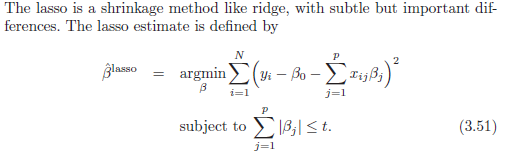

In [27]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("----Using Alpha = 1 (default)---")
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

lasso = Lasso(alpha = 10).fit(X_train, y_train) #In the result we see using this basically eliminates all features
print("\n----Using Alpha = 10---")
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

lasso = Lasso(alpha = .10).fit(X_train, y_train)
print("\n----Using Alpha = .10---")
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0))) 

lasso = Lasso(alpha = .0010).fit(X_train, y_train) #using too small of an alpha causes convergence issues (see warning)
print("\n----Using Alpha = .0010---") 
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

----Using Alpha = 1 (default)---
Training set score: 0.27
Test set score: 0.26
Number of features used: 3

----Using Alpha = 10---
Training set score: 0.00
Test set score: -0.03
Number of features used: 0

----Using Alpha = .10---
Training set score: 0.75
Test set score: 0.70
Number of features used: 12

----Using Alpha = .0010---
Training set score: 0.93
Test set score: 0.81
Number of features used: 76


C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lastly there is "Elastic Net" which combines the penalties for both Ridge and Lasso

In [31]:
from sklearn.linear_model import ElasticNet

en = ElasticNet().fit(X_train, y_train) #doesnt do very well 
print("----Using Alpha = 1 (default)---")
print("Training set score: {:.2f}".format(en.score(X_train, y_train)))
print("Test set score: {:.2f}".format(en.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(en.coef_ != 0)))

en = ElasticNet(alpha = 10).fit(X_train, y_train) #removes all features
print("\n----Using Alpha = 10 ---")
print("Training set score: {:.2f}".format(en.score(X_train, y_train)))
print("Test set score: {:.2f}".format(en.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(en.coef_ != 0)))

en = ElasticNet(alpha = 0.01).fit(X_train, y_train) #solid results 
print("\n----Using Alpha = 0.01 (default)---")
print("Training set score: {:.2f}".format(en.score(X_train, y_train)))
print("Test set score: {:.2f}".format(en.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(en.coef_ != 0)))

en = ElasticNet(alpha = 0.00001).fit(X_train, y_train) #overfitting
print("\n----Using Alpha = 0.00001 (default)---")
print("Training set score: {:.2f}".format(en.score(X_train, y_train)))
print("Test set score: {:.2f}".format(en.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(en.coef_ != 0)))

----Using Alpha = 1 (default)---
Training set score: 0.29
Test set score: 0.30
Number of features used: 34

----Using Alpha = 10 ---
Training set score: 0.00
Test set score: -0.03
Number of features used: 0

----Using Alpha = 0.01 (default)---
Training set score: 0.84
Test set score: 0.79
Number of features used: 82

----Using Alpha = 0.00001 (default)---
Training set score: 0.94
Test set score: 0.78
Number of features used: 104


C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
